In [1]:
import tensorflow as tf
import numpy as np
import time
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from IcGanLayer import gan_loss, classify_loss, autoencoder_loss, generator, IND_z, IND_y
from dataset_and_utils import prepare_datasets, show_image, show_gen, list_devices, prepare_new_datasets, save_image

In [2]:
n_classes = 100
batch_size = 32

config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
config.log_device_placement=True
config.allow_soft_placement=True

In [3]:
train_dataset, val_dataset, test_dataset = prepare_new_datasets(batch_size)

Duration is 16.257571935653687
Duration is 3.504459857940674
Duration is 3.0589096546173096


In [4]:
tf.reset_default_graph()
with tf.device('/device:GPU:0'):
    x = tf.placeholder(tf.float32, shape=[None, 64, 64,  3], name='x')
    y = tf.placeholder(tf.float32, shape=[None, n_classes], name='y')
    z = tf.placeholder(tf.float32, shape=[None, 100], name='z')
    learning_rate = tf.placeholder(tf.float32, shape=[], name='learning_rate')
    
    loss_autoencoder = autoencoder_loss(x, y, n_classes)
    loss_pred, loss_gen, gen = gan_loss(x, y, z, n_classes)
    loss_cls, Ey = classify_loss(x, y, n_classes)
    
    encoderZ = IND_z(x)
    
    evaluate = tf.equal(tf.round(Ey), y)
    accuracy = tf.reduce_mean(tf.cast(evaluate,dtype=tf.float32))
    
    saver = tf.train.Saver()
    
    # trainable variables for each network
    T_vars = tf.trainable_variables()
    D_vars = [var for var in T_vars if var.name.startswith('Discriminator')]
    G_vars = [var for var in T_vars if var.name.startswith('Generator') ]
    A_vars = [var for var in T_vars if var.name.startswith('Generator') or var.name.startswith('Encoder_Z')]
    C_vars = [var for var in T_vars if var.name.startswith('Encoder_Y')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        pred_optimizer = tf.train.AdamOptimizer(learning_rate, beta1=0.5).minimize(loss_pred, var_list=D_vars)
        gen_optimizer = tf.train.AdamOptimizer(learning_rate, beta1=0.5).minimize(loss_gen, var_list=G_vars)
        cls_optimizer = tf.train.AdamOptimizer(learning_rate, beta1=0.5).minimize(loss_cls, var_list=C_vars)
        autoencoder_optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss_autoencoder, var_list=A_vars)
    

In [5]:
#with tf.Session(config=config) as sess:
sess = tf.InteractiveSession(config=config)
init = tf.global_variables_initializer()
sess.run(init)

train_iterator = train_dataset.make_one_shot_iterator()
next_batch_data = train_iterator.get_next()

val_iterator = val_dataset.make_one_shot_iterator()
next_batch_val = val_iterator.get_next()

Epoch 1 Iter 500 0m:22s -- autoencoder loss: 0.039033
[[[ 0.69603497  0.7124331   0.69318384]
  [ 0.85024965  0.86899495  0.84315854]
  [ 0.83741456  0.86958426  0.86516351]
  ..., 
  [ 0.86682951  0.88389957  0.85196263]
  [ 0.85078239  0.8780638   0.84309959]
  [ 0.72871017  0.70013618  0.75596702]]

 [[ 0.8890121   0.86990285  0.88419229]
  [ 0.92448491  0.91557312  0.92953992]
  [ 0.95516253  0.94173509  0.92540985]
  ..., 
  [ 0.93081903  0.93750811  0.9373374 ]
  [ 0.9491787   0.93986964  0.91716433]
  [ 0.90297753  0.89487249  0.89794666]]

 [[ 0.87028146  0.86179823  0.88209409]
  [ 0.92514032  0.94408631  0.93716854]
  [ 0.95136839  0.9499923   0.95101494]
  ..., 
  [ 0.94604445  0.95113873  0.92980832]
  [ 0.93605161  0.952465    0.9058041 ]
  [ 0.89063305  0.86586124  0.87338829]]

 ..., 
 [[ 0.86892331  0.84468824  0.83316928]
  [ 0.9264105   0.92737353  0.90947604]
  [ 0.93738055  0.93936872  0.90670794]
  ..., 
  [ 0.89706969  0.90120405  0.82766074]
  [ 0.90481043  0.848

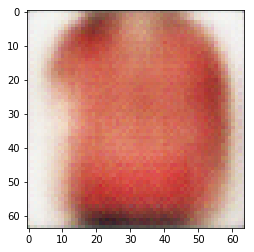

Epoch 1 Iter 1000 0m:44s -- autoencoder loss: 0.034230
[[[ 0.68276203  0.66330957  0.65659571]
  [ 0.79476035  0.74343777  0.74295229]
  [ 0.78522563  0.75625902  0.74859917]
  ..., 
  [ 0.58515638  0.47892565  0.43969944]
  [ 0.58409309  0.52180785  0.45361382]
  [ 0.55946064  0.53782856  0.50730246]]

 [[ 0.80618507  0.77385449  0.76310652]
  [ 0.86533004  0.80746847  0.78354055]
  [ 0.8604998   0.82544482  0.78327185]
  ..., 
  [ 0.595052    0.490601    0.41717759]
  [ 0.63669419  0.54778105  0.48560384]
  [ 0.59188974  0.54787624  0.50109655]]

 [[ 0.80165005  0.75903708  0.76872522]
  [ 0.84748757  0.81855804  0.80013925]
  [ 0.85939729  0.82217067  0.80895376]
  ..., 
  [ 0.5835858   0.46255445  0.4080148 ]
  [ 0.61589032  0.51943201  0.44968215]
  [ 0.62927854  0.57213783  0.51458144]]

 ..., 
 [[ 0.53417987  0.49073347  0.45611179]
  [ 0.51050901  0.43654606  0.39855793]
  [ 0.50375628  0.42771894  0.39085221]
  ..., 
  [ 0.73624277  0.6953463   0.63033813]
  [ 0.75565219  0.69

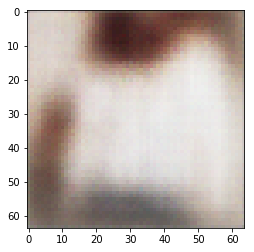

Epoch 1 Iter 1500 1m:8s -- autoencoder loss: 0.032426
[[[ 0.7260493   0.72503674  0.71060771]
  [ 0.85493815  0.84369147  0.84439218]
  [ 0.85068971  0.85338718  0.8579855 ]
  ..., 
  [ 0.89225876  0.90006715  0.88663423]
  [ 0.86928058  0.8939625   0.87555772]
  [ 0.75816625  0.75476134  0.77158457]]

 [[ 0.85844266  0.85826278  0.85387397]
  [ 0.91352803  0.90698546  0.89906824]
  [ 0.93436807  0.92487532  0.90551555]
  ..., 
  [ 0.95539445  0.95422381  0.95455819]
  [ 0.94992614  0.95709187  0.94460404]
  [ 0.9020505   0.89427137  0.9004401 ]]

 [[ 0.8680231   0.84690809  0.86007994]
  [ 0.92355669  0.91630948  0.91793847]
  [ 0.93648487  0.92563033  0.93290073]
  ..., 
  [ 0.96851963  0.96876615  0.96648842]
  [ 0.95844096  0.96712744  0.95174026]
  [ 0.90023208  0.90500969  0.89483809]]

 ..., 
 [[ 0.84446299  0.83362198  0.80797511]
  [ 0.91779733  0.89921552  0.88054281]
  [ 0.9248386   0.91890055  0.89643246]
  ..., 
  [ 0.9568336   0.95913863  0.94047254]
  [ 0.95314139  0.941

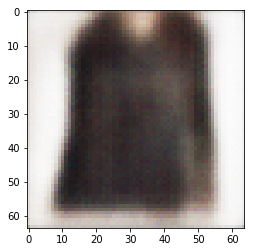

KeyboardInterrupt: 

In [7]:
# Train AutoEncoder
n_epoch = 2
test_every = 1
iter_print_every = 500

since = time.time()
epoch = 0
autoencoder_cost = 0.

while(epoch < n_epoch):
    iter_cnt = 0
    total_autoencoder_cost = 0.
    
    while True:
        iter_cnt += 1
        try:
            imgs, labs = sess.run(next_batch_data)
            _, autoencoder_cost = sess.run([autoencoder_optimizer, loss_autoencoder], feed_dict={x:imgs, y:labs})
                                   
            total_autoencoder_cost += autoencoder_cost
            
            if (iter_cnt + 1) % iter_print_every == 0:
                uptime = time.time() - since
                print('Epoch %d Iter %d %dm:%ds -- autoencoder loss: %f' % (epoch+1,iter_cnt+1,
                                                                   uptime//60, uptime%60,
                                                                   total_autoencoder_cost/iter_print_every))
                total_autoencoder_cost = 0.
                
                val_image = sess.run([gen], feed_dict={x:imgs, y:labs})
                
                val_image = np.array(val_image)
                print(np.squeeze(val_image)[0])
                show_image(np.squeeze(val_image)[0])
                
                
    
       
        except tf.errors.OutOfRangeError:
            train_iterator = train_dataset.make_one_shot_iterator()
            next_batch_data = train_iterator.get_next()
            break
            
    if (epoch+1) % test_every == 0:
        try:
            imgs, labs = sess.run(next_batch_val)
        except:
            val_iterator = val_dataset.make_one_shot_iterator()
            next_batch_val = val_iterator.get_next()
            imgs, labs = sess.run(next_batch_val)

        val_image = sess.run([gen], feed_dict={x:imgs, y:labs})

        show_image(imgs[0])
        val_image = np.array(val_image)
        show_image(np.squeeze(val_image)[0])
    
    epoch += 1

In [10]:
#saver.save(sess, 'model/autoencoder_5_epochs_model.ckpt')
#saver.restore(sess,"./model/autoencoder_5_epochs_model.ckpt")

Epoch 1 Iter 500 0m:56s -- \discriminator loss: nan, generator loss: nan


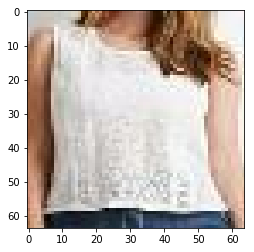

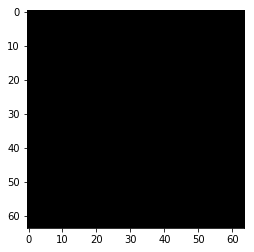

Epoch 1 Iter 1000 1m:54s -- \discriminator loss: nan, generator loss: nan


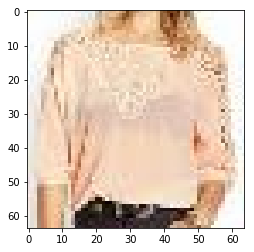

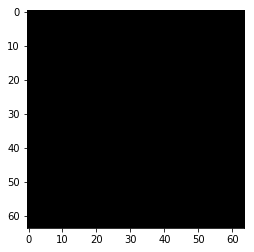

Epoch 1 Iter 1500 2m:52s -- \discriminator loss: nan, generator loss: nan


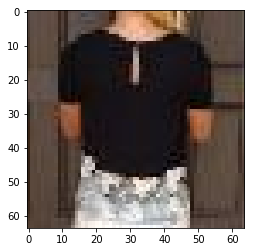

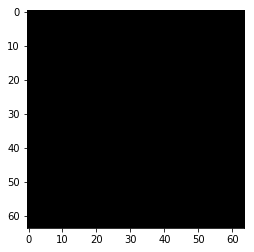

Epoch 2 Iter 500 4m:6s -- \discriminator loss: nan, generator loss: nan


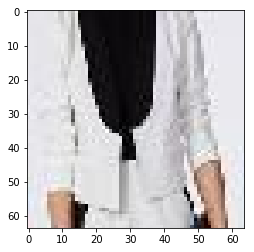

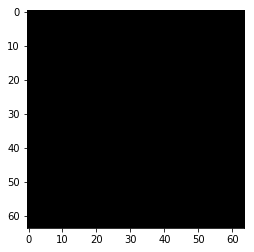

Epoch 2 Iter 1000 5m:4s -- \discriminator loss: nan, generator loss: nan


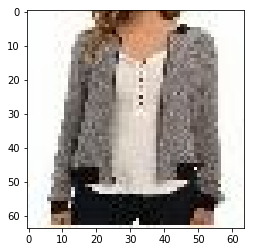

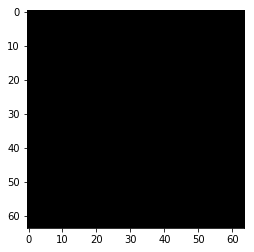

Epoch 2 Iter 1500 6m:1s -- \discriminator loss: nan, generator loss: nan


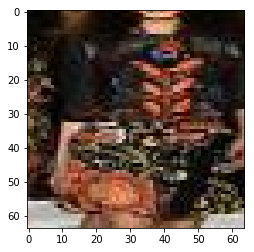

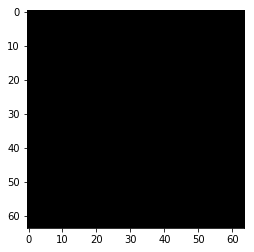

Epoch 2 Iter 2000 6m:59s -- \discriminator loss: nan, generator loss: nan


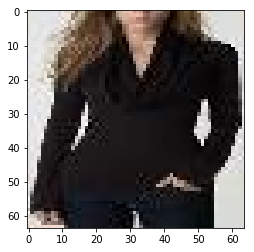

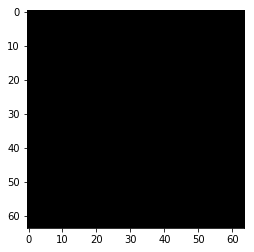

Epoch 2 Iter 2500 7m:57s -- \discriminator loss: nan, generator loss: nan


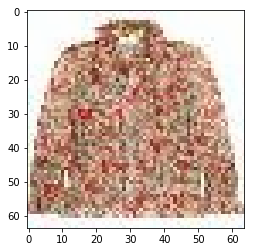

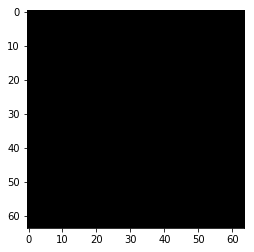

Epoch 2 Iter 3000 8m:56s -- \discriminator loss: nan, generator loss: nan


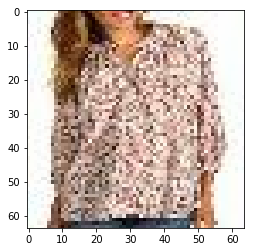

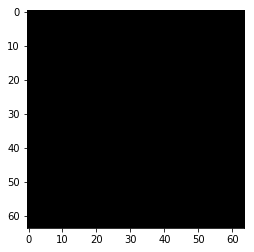

Epoch 2 Iter 3500 9m:55s -- \discriminator loss: nan, generator loss: nan


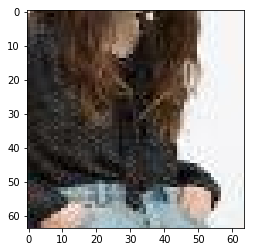

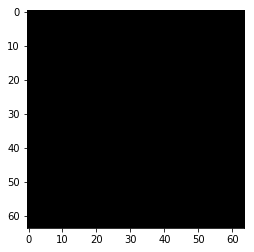

Epoch 2 Iter 4000 10m:52s -- \discriminator loss: nan, generator loss: nan


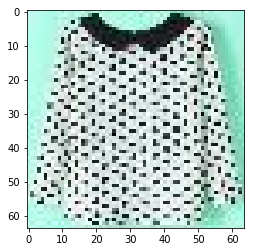

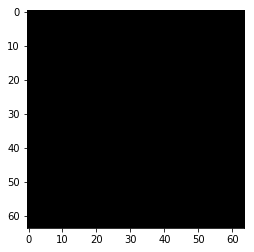

Epoch 2 Iter 4500 11m:49s -- \discriminator loss: nan, generator loss: nan


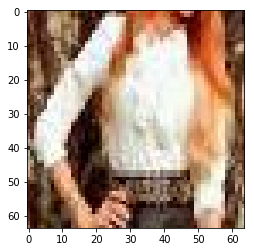

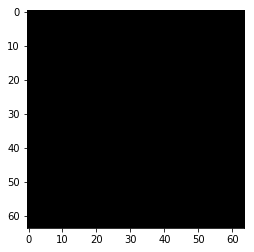

KeyboardInterrupt: 

In [7]:
n_epoch = 15
halve_lr_every = 20
test_every = 1
save_model_every = 10
iter_print_every = 500
lr = 2 * 10-4

since = time.time()
epoch = 0
pred_cost = 0.
gen_cost = 0.

while(epoch < n_epoch):
    iter_cnt = 0
    total_pred_cost = 0.
    total_gen_cost = 0.
    
    while True:
        iter_cnt += 1
        try:
            imgs, labs = sess.run(next_batch_data)
            noise = np.random.normal(0, 0.1, (batch_size, 100)).astype(np.float32)
    
            _,pred_cost = sess.run([pred_optimizer, loss_pred], feed_dict={x:imgs, y:labs, z:noise, learning_rate:lr})
            _,gen_cost = sess.run([gen_optimizer, loss_gen], feed_dict={x:imgs, y:labs, z:noise, learning_rate:lr})
            _,gen_cost = sess.run([gen_optimizer, loss_gen], feed_dict={x:imgs, y:labs, z:noise, learning_rate:lr})
                                   
            total_pred_cost += pred_cost
            total_gen_cost += gen_cost
            
            if (iter_cnt + 1) % iter_print_every == 0:
                uptime = time.time() - since
                print('Epoch %d Iter %d %dm:%ds -- \discriminator loss: %f, generator loss: %f' % (epoch+1,iter_cnt+1,
                                                                   uptime//60, uptime%60,
                                                                   total_pred_cost/iter_print_every,
                                                                   total_gen_cost/iter_print_every))
                
                total_pred_cost = 0.
                total_gen_cost = 0.
                
                try:
                    imgs, labs = sess.run(next_batch_val)
                except:
                    val_iterator = val_dataset.make_one_shot_iterator()
                    next_batch_val = val_iterator.get_next()
                    imgs, labs = sess.run(next_batch_val)

                noise = np.random.normal(0, 0.1, (batch_size, 100)).astype(np.float32)
                val_image = sess.run([gen], feed_dict={x:imgs, y:labs, z:noise})
                
                show_image(imgs[0])
                val_image = np.array(val_image)
                show_image(np.squeeze(val_image)[0])
    
       
        except tf.errors.OutOfRangeError:
            train_iterator = train_dataset.make_one_shot_iterator()
            next_batch_data = train_iterator.get_next()
            break
            
    '''if (epoch+1) % test_every == 0:
        try:
            imgs, labs = sess.run(next_batch_val)
        except:
            val_iterator = val_dataset.make_one_shot_iterator()
            next_batch_val = val_iterator.get_next()
            imgs, labs = sess.run(next_batch_val)

        val_image = sess.run([gen], feed_dict={x:imgs, y:labs})

        show_image(imgs[0])
        val_image = np.array(val_image)
        show_image(np.squeeze(val_image)[0])

    if (epoch+1) % save_model_every == 0:
        saver.save(sess, 'model/IcGan_'+str(epoch+1)+'_epochs')'''

    if (epoch+1) % halve_lr_every:
        lr /= 2
    
    epoch += 1

saver.save(sess, 'model/IcGan_final_model')

In [8]:
sess.close()

In [6]:
saver = tf.train.import_meta_graph('./model/IcGan_20_epochs.meta')
saver.restore(sess,tf.train.latest_checkpoint('./model'))

INFO:tensorflow:Restoring parameters from ./model/IcGan_20_epochs


[  82 : info                           ] Restoring parameters from ./model/IcGan_20_epochs


In [ ]:
with tf.Session(config=config) as sess:
    for epoch in range(n_iters):
        cls_cost = sess,run([cls_optimizer], feed_dict={x:dataset.nextbatch(), y:label.nextbatch()})
        print('classifer loss: %f, accuracy: %f' % (cls_cost, accuracy.eval()))
    saver.save(sess, 'save/to/path')
        

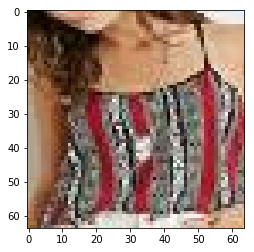

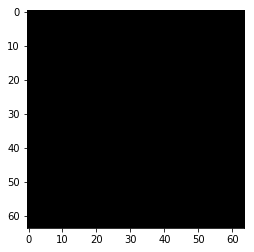

In [14]:
try:
    imgs, labs = sess.run(next_batch_val)
except:
    val_iterator = val_dataset.make_one_shot_iterator()
    next_batch_val = val_iterator.get_next()
    imgs, labs = sess.run(next_batch_val)

val_image = sess.run([gen], feed_dict={x:imgs, y:labs, learning_rate:lr})

show_image(imgs[0])
val_image = np.array(val_image)
show_image(np.squeeze(val_image)[0])

In [18]:
show_gen(next_batch_val, sess, gen)
show_gen(next_batch_val, sess, gen)

0